# Reaction Enumeration for CH Functionalization

### Reaction Constructor

Reagent A (Amine)/ Reagent B (Carboxylic Acid)

- h: hybridization ("sp3", "sp2", **"aro"**)
- X: Reacting atom(s) 
    (A: 1, (1,2), (1,3) for the carbon chain) 
    (B: "NH2", "OH", "alpha", "beta")
- Y: Modification (B: "-O" or "-N")

$$
^{h}A^{X}/ ^hB^{XY}
$$

In [1]:
from IPython.core.display import HTML
from IPython.display import IFrame
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Draw, AllChem

# Allow mol pics in dataframe
#from rdkit.Chem import PandasTools
#PandasTools.ChangeMoleculeRendering(renderer='PNG')
#PandasTools.RenderImagesInAllDataFrames(images=False)

from matplotlib import pyplot as plt

# Suppress waring messeges
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

import nglview

In [40]:
import importlib
import itertools
import reactants
importlib.reload(reactants)
from reactants import Carbon, Amine, Alcohol, Carboxyl, Bromide, Boronate
from rxnGen import  Product, GetRxn, Enumerator

In [3]:
from itertools import combinations, permutations, product

In [4]:
fluorene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C2C=CC=C3')
carbazole = Chem.MolFromSmiles('C12=CC=CC=C1NC3=C2C=CC=C3')
dibenzofuran = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C2C=CC=C3')

dihydroanthracene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C(C=CC=C3)C2')
dihydroacridine = Chem.MolFromSmiles('C12=CC=CC=C1NC3=C(C=CC=C3)C2')
xanthene = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C(C=CC=C3)C2')

dibenzoannulene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C(C=CC=C3)C=C2')
dibenzazepine = Chem.MolFromSmiles('C12=CC=CC=C1C=CC3=C(C=CC=C3)N2')
dibenzooxepine = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C(C=CC=C3)C=C2')

In [ ]:
polycyclics = [fluorene, carbazole, dibenzofuran, dihydroanthracene, dihydroacridine, xanthene, dibenzoannulene, dibenzazepine, dibenzooxepine]
labels = ['fluorene', 'carbazole', 'dibenzofuran', 'dihydroanthracene', 'dihydroacridine', 'xanthene', 'dibenzoannulene', 'dibenzazepine', 'dibenzooxepine']
Draw.MolsToGridImage(polycyclics, legends = labels)

The 7-membered ring needs a 4-carbon chain or gamma-carbons, this has not been implemented yet.

## Constructing Reactants

$$
\begin{aligned}
Reactant Type: \\
A &= Carbon\;/\;Carbon\;Chains \\
Hybridization: \\
h &= sp^2 \\
Reaction Atoms: \\
X &= (1,3)
\end{aligned}
\\
$$

$$
^{h}A^{X} \rightarrow {}^{sp^2}Carbon^{(1,3)}
$$

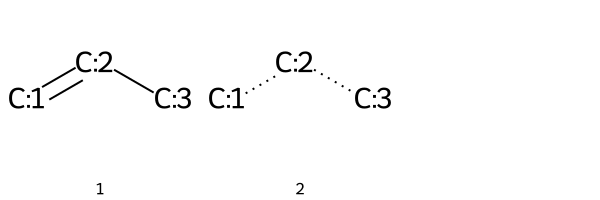

In [13]:
Carbon('sp2',(1,3))

$$
\begin{aligned}
Reactant Type: \\
B &= Amine \\
Hybridization: \\
h &= sp^2 \\
Reaction Atoms: \\
X &= (1,3)
\end{aligned}
\\
$$

$$
^{h}A^{X} \rightarrow {}^{sp^2}Amine^{(1,3)}
$$

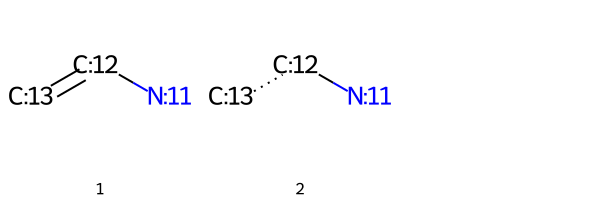

In [6]:
Amine('sp2',(1,3))

### Modification on Reactant

e.g. Deamination

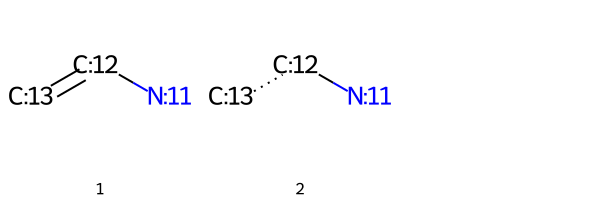

In [15]:
Amine('sp2',3,'-N')

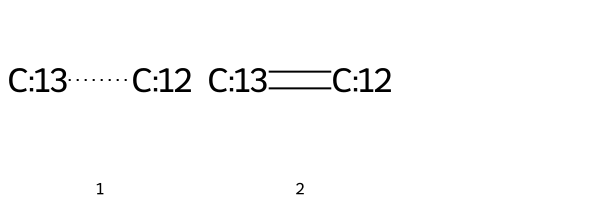

In [16]:
Amine('sp2',3,'-N').Modify()

## Constructing Reactions

Carbon
Hybridization of C1 : 	h = sp3
Reaction Atom(s) : 	X = (1,)

Carboxyl
Hybridization of C : 	h = sp3
Reaction Atom(s) : 	X = (22,)
Modification : 		Y = +H

0 	 [C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >> [C:1]-[C:22](-[C:23])-[C:21]-[O:25]


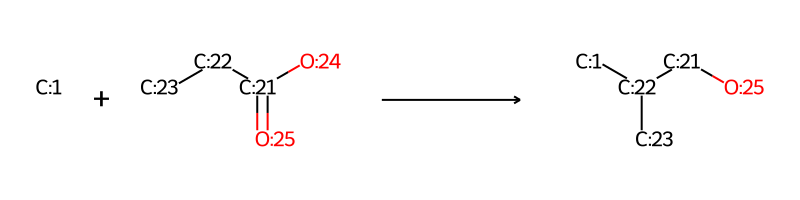

In [52]:
A = Carbon('sp3',1)
B = Carboxyl('sp3',2,"+H")
GetRxn(A,B)

### Ring Forming
$$
{}^{sp^2}Carbon^{(1,3)}\;/\;{}^{sp^2}Amine^{(1,3)}
$$

Carbon
Hybridization of C1 : 	h = sp2
Reaction Atom(s) : 	X = (1, 3)

Amine
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = (11, 13)
Modification : 		Y = None

0 	 [C:1]=[C:2]-[C:3] . [C:13]=[C:12]-[N:11] >> [C:1]1=[C:2]-[C:3]-[C:13]=[C:12]-[N:11]-1


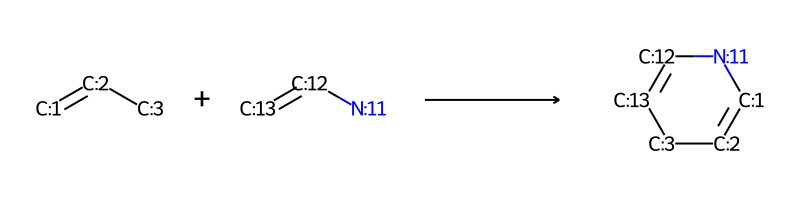

1 	 [C:1]=[C:2]-[C:3] . [C:13]=[C:12]-[N:11] >> [C:1]1=[C:2]-[C:3]-[C:13]=[C:12]-[n:11]-1


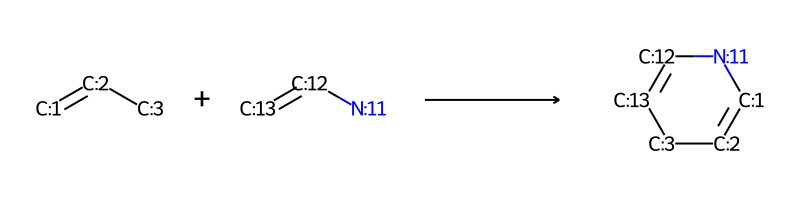

2 	 [C:1]=[C:2]-[C:3] . [c:13][c:12]-[N:11] >> [C:1]1=[C:2]-[C:3]-[c:13][c:12]-[N:11]-1


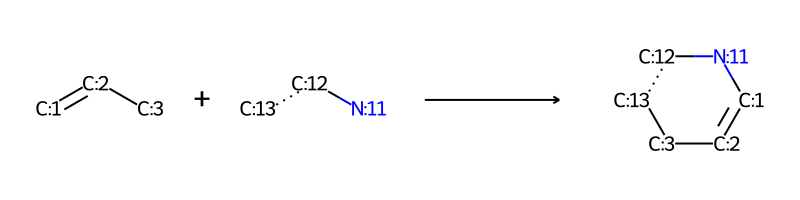

3 	 [c:1][c:2][c:3] . [C:13]=[C:12]-[N:11] >> [#6H:1]1:[#6H:2]:[#6H:3]:[#6H:13]:[#6H:12]:[#7:11]:1


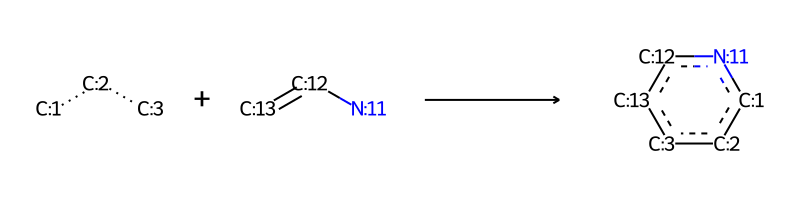

4 	 [c:1][c:2][c:3] . [c:13][c:12]-[N:11] >> [#6H:1]1:[#6H:2]:[#6H:3]:[#6H:13]:[#6H:12]:[#7:11]:1


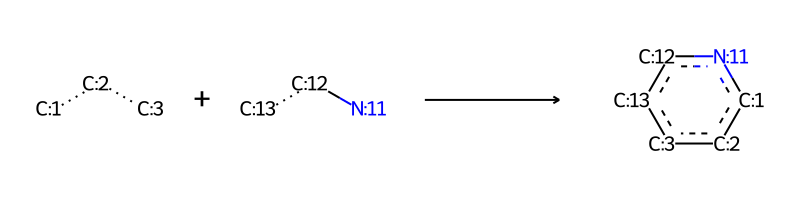

In [7]:
GetRxn(Carbon('sp2',(1,3)),Amine('sp2',(1,3)))

## Reaction Enumeration

### Write out all the possible configurations for each argument

In [ ]:
ConfigDict = {'Carbon':{'X':(1, (1,2), (1,3), (2,1), (3,1))},
              'Amine':{'X':(1, 2, 3, *itt.permutations(range(1,4),2)),
                       'Y':(None, '-B')},
              'Alcohol':{'X':(1, 2, 3, *itt.permutations(range(1,4),2)),
                         'Y':(None, '-B')},
              'Carboxyl':{'X':(1,2,3,4,(1,2),(1,3),(2,3),(2,4),
                              (3,4),(2,1),(3,1),(3,2),(4,2),(4,3)),
                          'Y':(None, '-B', '-OH', '+H', '+H2')},
              'Boronate':{'X':(1,2,3,4,5, *itt.permutations(range(2,6),2)),
                          'Y':(None, '-C')},
              'Bromide':{'X':(2, 3, (2,3), (3,2)),
                         'Y':(None, '-B')},
          }

### Construct DataFrame for Enumerated Rxns

In [42]:
df = Enumerator('Carbon','Carboxyl').MakeDataFrame()
df.drop(columns = ['Product','rxn']) 

,A B Configs,A,B,rxn SMARTS
0,"((sp3, 1), (sp3, 1, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
1,"((sp3, 1), (sp3, 1, -OH))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
2,"((sp3, 1), (sp3, 1, +H))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
3,"((sp3, 1), (sp3, 1, +H2))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
4,"((sp3, 1), (sp3, 2, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
...,...,...,...,...
1023,"((sp2, (3, 1)), (sp2, (4, 3), +H))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...
1024,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[C:23]=[C:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [C:23]=[C:22]-[C:21](-[O:2...
1025,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [c:23][c:22]-[C:21](-[O:24...
1026,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...


### Drop Duplicates

In [43]:
df_unique = df.drop_duplicates('rxn SMARTS')
df_unique.drop(columns = ['Product','rxn'])

,A B Configs,A,B,rxn SMARTS
0,"((sp3, 1), (sp3, 1, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
1,"((sp3, 1), (sp3, 1, -OH))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
2,"((sp3, 1), (sp3, 1, +H))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
3,"((sp3, 1), (sp3, 1, +H2))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
4,"((sp3, 1), (sp3, 2, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...
...,...,...,...,...
851,"((sp2, (1, 3)), (sp2, (4, 3), +H))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...
852,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[C:23]=[C:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [C:23]=[C:22]-[C:21](-[O:2...
853,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [c:23][c:22]-[C:21](-[O:24...
854,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...


## Enumeration on Quinine and Aldrich Catalog

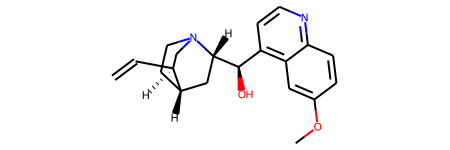

In [47]:
quinine = Chem.MolFromSmiles('COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O')
quinine

In [46]:
m = quinine
#m = Chem.AddHs(m)
AllChem.EmbedMolecule(m,AllChem.ETKDG())
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
nglview.show_rdkit(m)

NGLWidget()

## Aldrich Catalog (Core)

Commercially available reagents from Sigma Aldrich